In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3 + 10z^2 + 169z}{3z^2 + 20z + 169} = \frac{2 z^2 (z + 5)}{3 z^2 + 20 z + 169}$$

of the Newton-Raphson method for the equation $z^3+10z^2+169z=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [15]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return (2*(z*z)*(z+5))/(3*(z*z)+20*z+169)
#the 3 roots
zz=[0,complex(-5,-12),complex(-5,12)]
#corresponding colors
cc=[[1,0,0],[0,1,0],[0,0,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

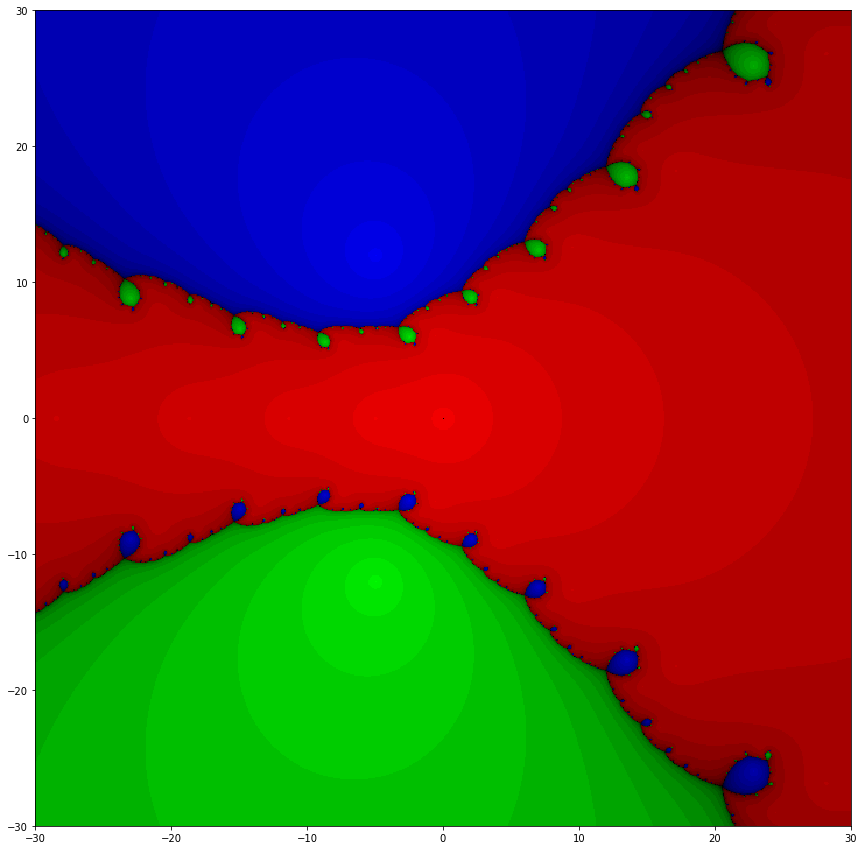

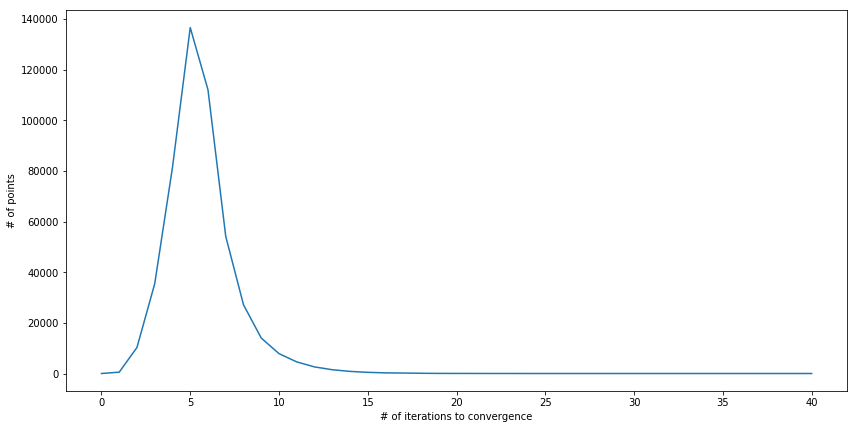

In [24]:
xmin = -30
xmax = 30
ymin = -30
ymax = 30
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[np.maximum(0,np.minimum(1,(sit-k)*f*c)) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

QUESTION 3:
By zooming on the boundary, we also observe fractals.
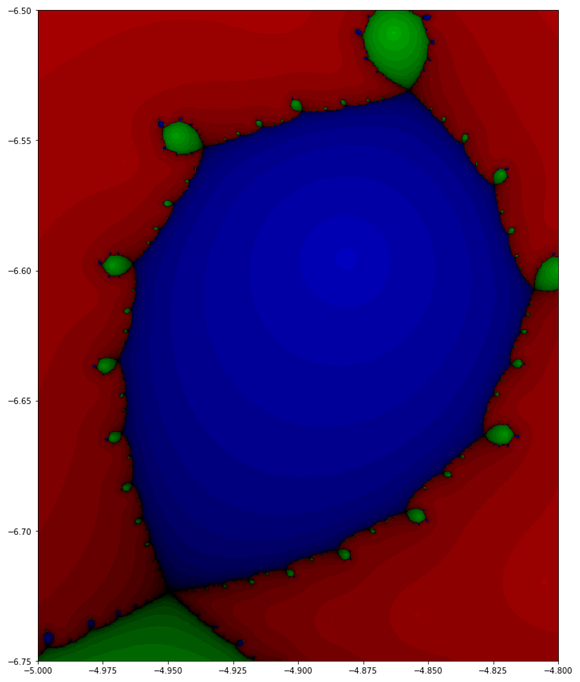
We note that the "red part", corresponding to the 0 root, is really apart from the fractal.
In fact, in the more general picture we see a kind of a red bridge between the two imaginary roots. This is because of the symmetry, and the 0 root does not intervene in the space for the 2 other ones.
